In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split    
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression  

In [2]:
df = pd.read_csv("data/twitter.csv", index_col = 0)
print("Data size is: ", df.shape)
df.head()

Data size is:  (9119, 1)


,intention
tweet,
my life is meaningless i just want to end my life so badly my life is completely empty and i dont want to have to create meaning in it creating meaning is pain how long will i hold back the urge to run my car head first into the next person coming the opposite way when will i stop feeling jealous of tragic characters like gomer pile for the swift end they were able to bring to their lives,1
muttering i wanna die to myself daily for a few months now i feel worthless shes my soulmate i cant live in this horrible world without her i am so lonely i wish i could just turn off the part of my brain that feels,1
work slave i really feel like my only purpose in life is to make a higher man money parents forcing me through college and i have too much on my plate i owe a lot of money i know this is the easy way out but i am really tired all of these issues are on top of dealing with tensions in america as well i want to rest,1
i did something on the 2 of october i overdosed i just felt so alone and horrible i was in hospital for two days now when i walk down the hallways of my school they always look at me weird and say i should take more pills and i hate it i have no one i have this voice in my head now and it wont go away and i cant be myself anymore thanks for reading,1
i feel like no one cares i just want to die maybe then i d feel less lonely,1


In [3]:
df.describe()

,intention
count,9119.000000
mean,0.438425
std,0.496221
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [4]:
temp_data = df.copy() # temporary dataset containing standarized values

intention_mean = temp_data['intention'].mean()
intention_std = temp_data['intention'].std()
temp_data['intention'] = (temp_data['intention'] - intention_mean) / intention_std


temp_data

,intention
tweet,
my life is meaningless i just want to end my life so badly my life is completely empty and i dont want to have to create meaning in it creating meaning is pain how long will i hold back the urge to run my car head first into the next person coming the opposite way when will i stop feeling jealous of tragic characters like gomer pile for the swift end they were able to bring to their lives,1.131702
muttering i wanna die to myself daily for a few months now i feel worthless shes my soulmate i cant live in this horrible world without her i am so lonely i wish i could just turn off the part of my brain that feels,1.131702
work slave i really feel like my only purpose in life is to make a higher man money parents forcing me through college and i have too much on my plate i owe a lot of money i know this is the easy way out but i am really tired all of these issues are on top of dealing with tensions in america as well i want to rest,1.131702
i did something on the 2 of october i overdosed i just felt so alone and horrible i was in hospital for two days now when i walk down the hallways of my school they always look at me weird and say i should take more pills and i hate it i have no one i have this voice in my head now and it wont go away and i cant be myself anymore thanks for reading,1.131702
i feel like no one cares i just want to die maybe then i d feel less lonely,1.131702
...,...
have you ever laid on your bed at night and cried because you re not good enough counted all your flaws and felt worse about yourself and just felt to ugly and alone,1.131702
the fault the blame the pain s still there i m here alone inside of this broken home broken home,1.131702
stop asking me to trust you when i m still coughing up the water from the last time you let me drown,1.131702


In [5]:
# sklearn preprocessing.scale function
df_standardize = preprocessing.scale(df)

#Convert standardized data to dataset
df_standardize = pd.DataFrame(df_standardize, columns = df.columns)

df_standardize

,intention
0,1.131764
1,1.131764
2,1.131764
3,1.131764
4,1.131764
...,...
9114,1.131764
9115,1.131764
9116,1.131764
9117,1.131764


In [6]:
df_standardize.insert(0, 'all_ones', 1)
df_standardize

,all_ones,intention
0,1,1.131764
1,1,1.131764
2,1,1.131764
3,1,1.131764
4,1,1.131764
...,...,...
9114,1,1.131764
9115,1,1.131764
9116,1,1.131764
9117,1,1.131764


In [7]:
# type of advertising selection
features = df_standardize[['all_ones']]
target = df_standardize['intention'] # target - sales column dependent variable
# 0.85 ratio for training and 0.25 ratio for testing
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.75, test_size = 0.25)

In [8]:
def initialize_weights(X, random = False):
    X_len = X.shape[1] # number of columns in x is equal to the weight lengths
    if random: # if the length is random, it will be initialized randomly too
        return np.random.rand(X_len)
    return np.zeros(X_len) # else return zero or initialized to zero

In [9]:
weights = initialize_weights(X_train, random = True)
weights

array([0.23822674])

In [10]:
weights = initialize_weights(X_train)
weights

array([0.])

In [11]:
def predict(X, weights):
    #Using numpy's dot product function to multiply every weight to its interrelated feature from x
    return np.dot(X, weights)

In [12]:
#Predict the training set's values using a random set of weights
y_hat_train = predict(X_train, initialize_weights(X_train, random = True))

# comparing predicted and actual values
df_train = pd.DataFrame({'Actual Values': y_train, 'Predicted Values': y_hat_train})
df_train

,Actual Values,Predicted Values
5630,-0.883576,0.404621
2400,1.131764,0.404621
928,1.131764,0.404621
6327,-0.883576,0.404621
4476,-0.883576,0.404621
...,...,...
3158,1.131764,0.404621
706,1.131764,0.404621
7670,-0.883576,0.404621
7803,-0.883576,0.404621


In [13]:
def compute_intention(X, y, weights):  
    m = len(y) # length of the response
    intention_function = 1/(2*m) * np.sum((predict(X, weights) - y)**2)
    return intention_function

In [14]:
#Print the cost function of the training set utilizing a random set of weights
intention_test = compute_intention(X_train, y_train, initialize_weights(X_train, random = True))
print(intention_test)

0.7506348912516461


In [15]:
def compute_gradient(X, y, weights):
    m = len(y)
    w = 1/m * np.dot(X.T, (predict(X, weights) - y))

    return w     #returns matrix w

In [16]:
def update_weights(X, y, weights, alpha):
    return weights - alpha * compute_gradient(X, y, weights)

In [17]:
def grad_descent(X, y, weights, alpha, iterations):  #Initialization of the two matrices
    weights_matrix = [0] * iterations
    intention_matrix = [0] * iterations

    for j in range(iterations):  # Looping through the no. of iterations and utilizing batch gradient descent
        weights = update_weights(X, y, weights, alpha)     #Updating weights
        weights_matrix[j] = weights #Store the weights in the weights matrix
        intention = compute_intention(X, y, weights)  #Computing cost
        intention_matrix[j] = intention  #Store the cost in the cost matrix
    return weights_matrix, intention_matrix

In [18]:
def plot_intention(intention_array): #Size of the plot
    plt.figure(figsize=(15,8))
    plt.plot(cost_array)
    plt.xlabel('Tweets')
    plt.ylabel('Intention')
    plt.title('Intention over Tweets')
    plt.show()

In [19]:
weights = initialize_weights(X_train, random = True)
y_hat_train = predict(X_train, weights)
y_hat_train_df = pd.DataFrame({'Actual Values': y_train, 'Predicted Values': y_hat_train})
y_hat_train_df

,Actual Values,Predicted Values
5630,-0.883576,0.573032
2400,1.131764,0.573032
928,1.131764,0.573032
6327,-0.883576,0.573032
4476,-0.883576,0.573032
...,...,...
3158,1.131764,0.573032
706,1.131764,0.573032
7670,-0.883576,0.573032
7803,-0.883576,0.573032


In [20]:
# formula for getting the cost of the predicted values
train_cost = compute_intention(X_train, y_train, weights)
train_cost

0.6682031248398557

In [21]:
weights = initialize_weights(X_test, random = True)
y_hat_test = predict(X_test, weights)
y_hat_test_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_hat_test})
y_hat_test_df['Residual Values'] = y_hat_test_df['Actual Values'] - y_hat_test_df['Predicted Values']
y_hat_test_df

,Actual Values,Predicted Values,Residual Values
3208,1.131764,0.365269,0.766496
8737,-0.883576,0.365269,-1.248845
9047,-0.883576,0.365269,-1.248845
3404,-0.883576,0.365269,-1.248845
2803,1.131764,0.365269,0.766496
...,...,...,...
3521,-0.883576,0.365269,-1.248845
5258,-0.883576,0.365269,-1.248845
3681,-0.883576,0.365269,-1.248845
451,1.131764,0.365269,0.766496


In [22]:
# formula for getting the cost of the predicted values
test_cost = compute_intention(X_test, y_test, weights)
test_cost

0.5602320129345434

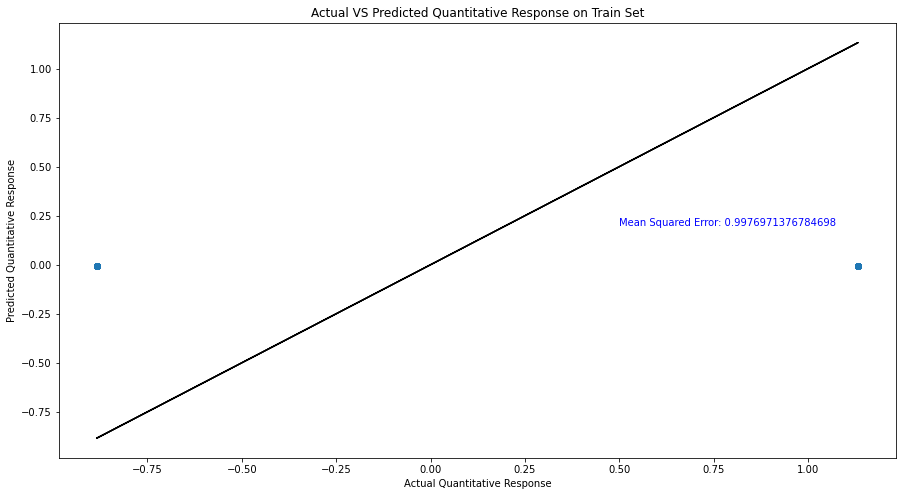

In [23]:
weights = initialize_weights(X_train, random = True)

# variable for alpha and iteration
alpha = 0.01
iterations = 10000 

# running gradient descent algorithm for training and testing
weights_matrix_training, intention_matrix_training = grad_descent(X_train, y_train, weights, alpha, iterations)
weights_matrix_testing, intention_matrix_testing = grad_descent(X_test, y_test, weights, alpha, iterations)

# predicting the quantitative response using the train set
y_hat_train = predict(X_train, weights_matrix_training[-1])

# plotting the actual and predicted response of the train set
plt.figure(figsize=(15,8))
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
plt.title('Actual VS Predicted Quantitative Response on Train Set')
plt.scatter(y_train, y_hat_train)
plt.plot(y_train, y_train, color="black")
plt.text(0.5, 0.20, f"Mean Squared Error: {mean_squared_error(y_train, y_hat_train)}", color='blue')
plt.show()

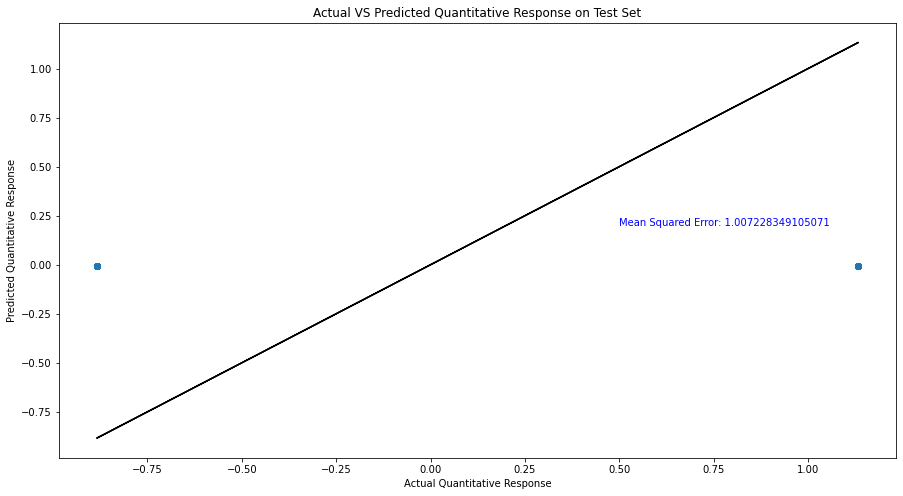

In [24]:
# predicting the quantitative response using the test set this time
y_hat_test = predict(X_test, weights_matrix_training[-1])

# plotting the actual and predicted response of the test set
plt.figure(figsize=(15,8))
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
plt.title('Actual VS Predicted Quantitative Response on Test Set')
plt.scatter(y_test, y_hat_test)
plt.plot(y_test, y_test, color="black")
plt.text(0.5, 0.20, f"Mean Squared Error: {mean_squared_error(y_test, y_hat_test)}", color='blue')
plt.show()

In [25]:
df_standardize

#Add a new column which is the predicted sales
df_standardize['Predicted intention'] = predict(df_standardize[['all_ones']], weights_matrix_training[-1])

#Revert back the standardized data into the original form 
df_standardize['intention'] = df_standardize['intention'] * df['intention'].std() + df['intention'].mean()
df_standardize['Predicted intention'] = df_standardize['Predicted intention'] * df['intention'].std() + df['intention'].mean()

#Insert Residuals column
df_standardize['Residuals'] = df_standardize['intention'] - df_standardize['Predicted intention']

# Drop all_ones column
df_standardize.drop('all_ones', axis = 1, inplace = True)

df_standardize

,intention,Predicted intention,Residuals
0,1.000031,0.433981,0.566049
1,1.000031,0.433981,0.566049
2,1.000031,0.433981,0.566049
3,1.000031,0.433981,0.566049
4,1.000031,0.433981,0.566049
...,...,...,...
9114,1.000031,0.433981,0.566049
9115,1.000031,0.433981,0.566049
9116,1.000031,0.433981,0.566049
9117,1.000031,0.433981,0.566049


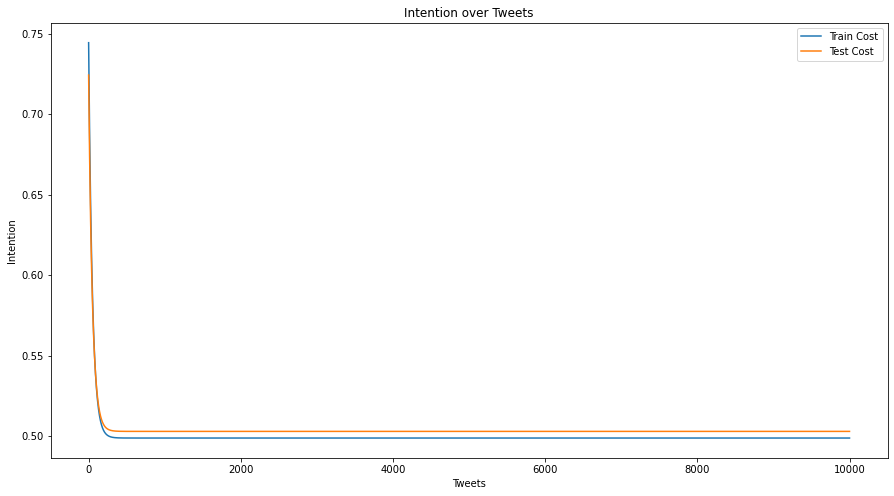

In [27]:
plt.figure(figsize=(15,8))
plt.plot(intention_matrix_training, label='Train Cost')
plt.plot(intention_matrix_testing, label='Test Cost')
plt.xlabel('Tweets')
plt.ylabel('Intention')
plt.title('Intention over Tweets')
plt.legend()
plt.show()

<b>What I can see here in the plot is that the model becomes less accurate if there is only less iterations or tweets. This means that using Linear Regression to predict the suicide rate intention based on analyzing tweets is not a suited model to predict such suicide intentions.<b>